## Python Implementation of Thesis

##  Image to Pixel Value

Now lets try convert one image into its pixel values and then take the pixel value to generate an image

In [56]:
load_test_image = "chest_xray/train/PNEUMONIA/person1_bacteria_1.jpeg"

(712, 439)


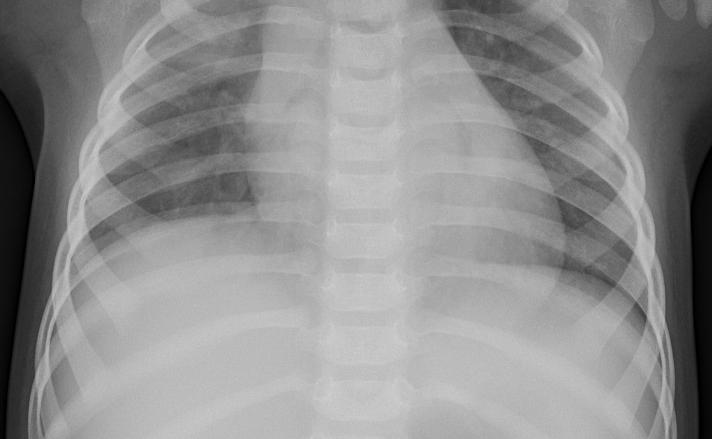

In [63]:
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt


image = Image.open(load_test_image).convert('L') # Load in an image and covert to greyscale. 

print(image.size)
image

In [64]:
pixel_array = np.array(image) #get pixel values into numpy array 
print(pixel_array.shape) # Look at the shape of the numpy array

(439, 712)


In [65]:
print(pixel_array[1]) # example row from array of images pixel values

[ 68  69  69  69  69  68  67  66  68  69  70  71  71  71  70  69  75  74
  74  76  80  81  80  78  80  80  81  82  83  83  83  83  84  83  83  82
  82  83  83  84  85  86  88  89  90  89  88  87  87  90  89  86  86  89
  90  87  89  90  90  91  92  93  93  93  92  92  92  92  92  93  95  95
  91  92  92  93  93  92  92  91  91  98 107 112 112 111 112 113 115 116
 117 117 116 116 119 121 120 121 122 124 125 127 128 129 134 134 136 138
 140 139 136 133 134 130 129 132 134 133 132 134 141 142 142 140 139 140
 142 143 143 144 143 142 139 138 138 138 139 135 134 137 137 134 136 140
 129 132 135 135 133 131 133 136 140 139 138 137 135 133 130 128 147 157
 155 153 162 163 158 159 165 165 166 166 167 168 168 169 171 171 171 170
 170 169 169 168 166 164 161 158 155 154 153 153 155 155 155 153 150 148
 148 148 147 146 145 143 142 142 142 142 141 136 130 127 127 127 127 126
 124 124 123 122 122 122 122 123 120 120 120 120 120 120 120 120 117 117
 118 120 122 121 119 116 116 114 112 112 115 118 12

In [ ]:
flattened_image = image_array.flatten() # flatten the whole array as one input instead of 439 inputs 

In [67]:
flattened_image = np.asarray(pixel_array).reshape((439,712)) # reshape

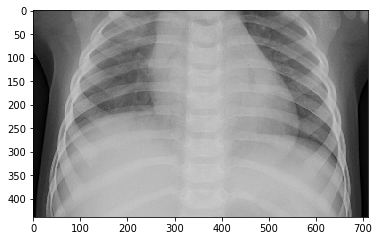

In [69]:
plt.imshow(flattened_image, cmap='gray', vmin=0,vmax=255 ,
           interpolation='None') 


## Preprocessing data


In this stage of the Deep Learning pipeline , we need to preprocess the dataset of images into their pixel values. 
Lets go through the stages : 

# Preprocessing
## 1. Convert to grayscale
## 2. Rescale Image to 250x250
## 3. Scale pixel range to 0-1
## 4. Concatenate 2 numpy arrays 

In [112]:
from PIL import Image
import numpy as np
import cv2
import matplotlib.pyplot as plt
# glob helps select multiple files using patterns
import glob
import pandas as pd



def preprocess(arr,class_label,load_images):
    folder_expr = load_images + '/*.jpeg'
    # Loop over images in folder
    # extract each images length and height into seperate arrays
    for image_file_name in glob.glob(folder_expr):
        # Convert image to greyscale
        image = Image.open(image_file_name).convert('L')
        # Resize image to 250 x 250
        dsize = (250,250)
        image = image.resize(dsize)
        image_array = np.array(image)
        image_array = image_array.astype('float32')
        image_array /=255.0
        image_array=np.insert(image_array.flatten(),0,class_label,axis=0)
        arr.append(image_array)


In [101]:
load_images = "chest_xray/train/PNEUMONIA"
load_images2 = "chest_xray/train/NORMAL"

In [104]:
pneumonia_train =[]
normal_train =[]
#--------------------------------------------------------------------------------------
preprocess(pneumonia_train,1,load_images)
preprocess(normal_train,0,load_images2)
pneumonia_train = np.array(pneumonia_train)
print(pneumonia_train.shape)
normal_train = np.array(normal_train)
print(normal_train.shape)

(3875, 62501)
(1341, 62501)


In [105]:
training_data = np.concatenate((pneumonia_train,normal_train),axis=0)
print(training_data.shape)

(5216, 62501)


In [106]:
print(training_data[3874])
print(training_data[3875])


[1.         0.05098039 0.05490196 ... 0.05098039 0.04705882 0.04705882]
[0.         0.09019608 0.07058824 ... 0.44705883 0.45882353 0.44313726]


## Save numpy arrays to folder as .npy 

In [126]:
from numpy import save
from numpy import load
#save('training_data.npy',training_data) ##Saving numpy array 
train_data = load('training_data.npy')

In [108]:
print(training_data[3874])
print(training_data[3875])

[1.         0.05098039 0.05490196 ... 0.05098039 0.04705882 0.04705882]
[0.         0.09019608 0.07058824 ... 0.44705883 0.45882353 0.44313726]


## Create test set

In [110]:
load_test_images = "chest_xray/test/PNEUMONIA"
load_test_images2 = "chest_xray/test/NORMAL"

In [113]:
pneumonia_test =[]
normal_test =[]
#--------------------------------------------------------------------------------------
preprocess(pneumonia_test,1,load_test_images)
preprocess(normal_test,0,load_test_images2)
pneumonia_test = np.array(pneumonia_test)
print(pneumonia_test.shape)
normal_test = np.array(normal_test)
print(normal_test.shape)

(390, 62501)
(234, 62501)


In [114]:
testing_data = np.concatenate((pneumonia_test,normal_test),axis=0)
print(testing_data.shape)

(624, 62501)


In [123]:
print(testing_data[389])
print(testing_data[390])

[1.         0.03137255 0.04705882 ... 0.         0.         0.        ]
[0.         0.12156863 0.12156863 ... 0.1254902  0.12941177 0.13333334]


In [127]:
from numpy import save
from numpy import load
#save('testing_data.npy',testing_data) ##Saving numpy array 
test_data = load('testing_data.npy')

## Apply Simple CNN architecture

### Class labels need to be organised into one hot encoded vectors

In [135]:
X_train = train_data[0:,1:]
Y_train = train_data[0:,0:1]
X_test = test_data[0:,1:]
Y_test = test_data[0:,0:1]

In [136]:
## Confirm splits haven been made
print(X_train.shape)
print(Y_train.shape)
print(X_test.shape)
print(Y_test.shape)

(5216, 62500)
(5216, 1)
(624, 62500)
(624, 1)


In [ ]:
#from keras.utils import np_utils

y_train_ohe = keras.utils.to_categorically(y_train,2)
y_test_ohe = keras.utils.to_categorically()